In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import files
uploaded = files.upload()
# %%
import pandas as pd
import io

# Get the name of the uploaded file
file_name = list(uploaded.keys())[0]

# Load data into a DataFrame using io.BytesIO to read the uploaded file content
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# View the first few rows
df.head()

Saving Fortune500Sector.xlsx to Fortune500Sector.xlsx


,Company,Sector,Profits ($ millions),Market Capitalization ($ millions)
0,Alliant Techsystems,Industrials,313.2,1891.9
1,Amazon.com,Consumer,631.0,81458.6
2,AmerisourceBergen,Healthcare,706.6,10087.6
3,Avis Budget Group,Industrials,-29.0,1175.8
4,Boeing,Industrials,4018.0,55188.8


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

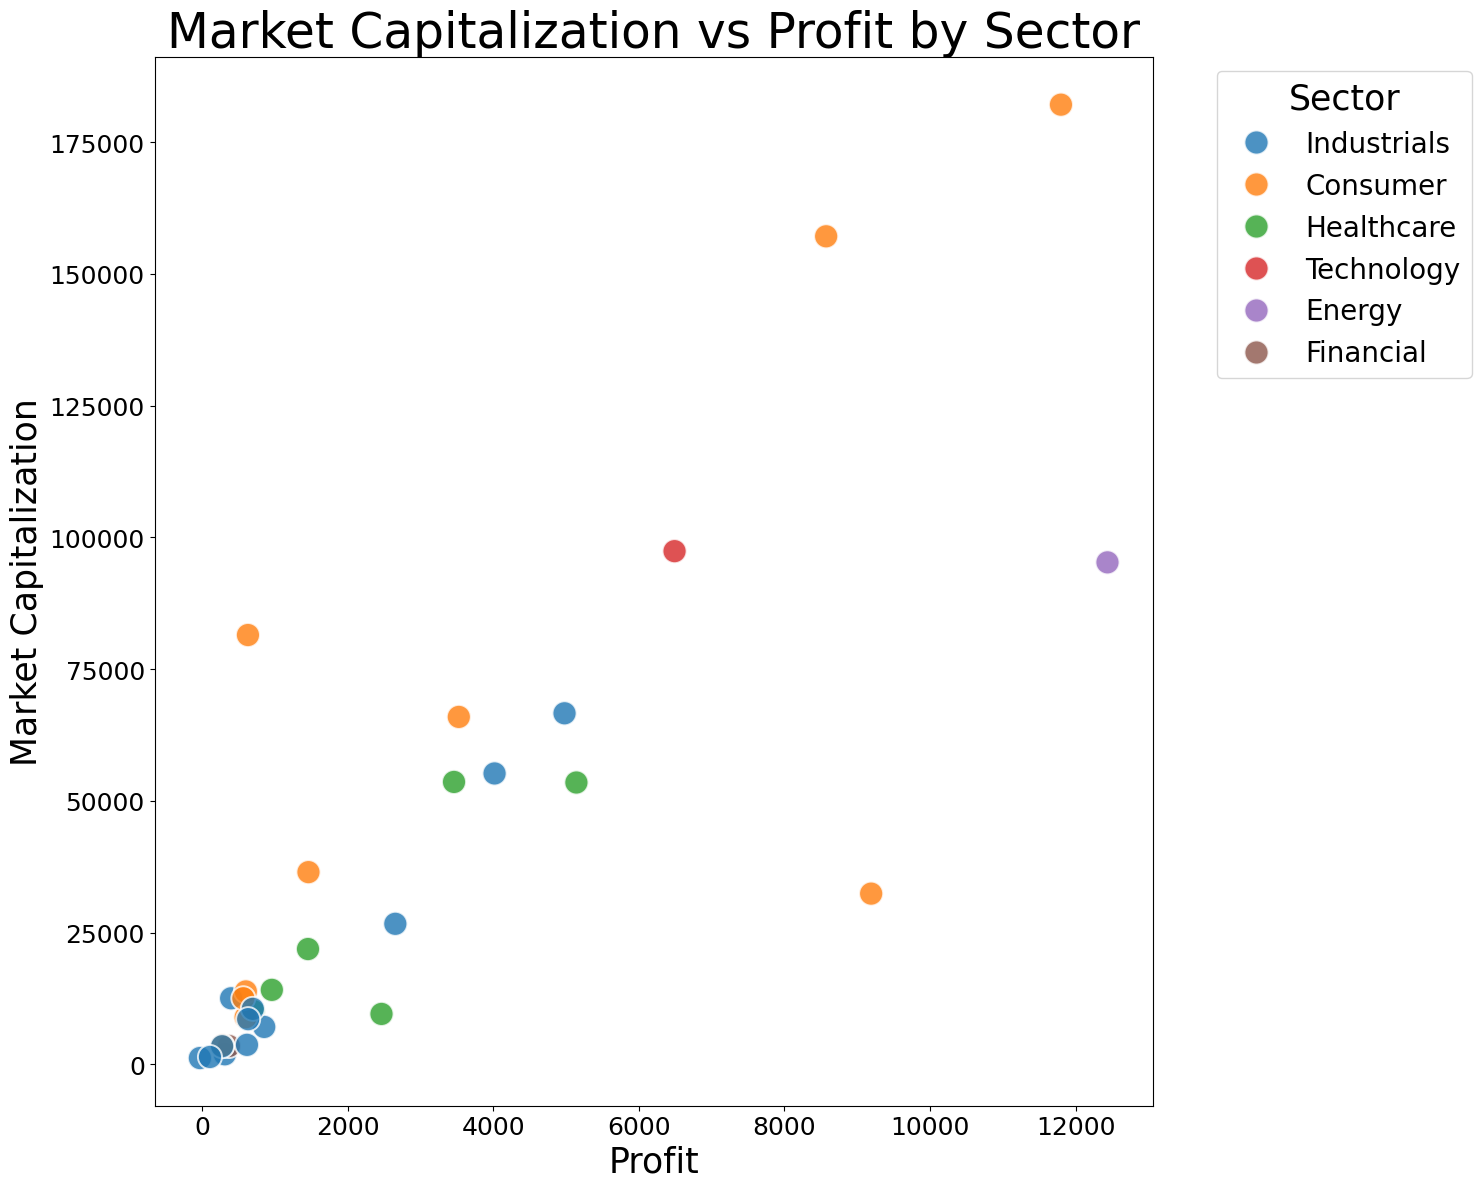

In [ ]:
# Set figure size
plt.figure(figsize=(15, 12))

# Create scatter plot
sns.scatterplot(
    data=df,
    x='Profits ($ millions)',
    y='Market Capitalization ($ millions)',
    hue='Sector', # Different colors for each sector
    palette='tab10', # Color palette
    s=300, # size of points
    alpha=0.8 # transparency level
)

# Title and labels
plt.title('Market Capitalization vs Profit by Sector', fontsize=35)
plt.xlabel('Profit', fontsize=25)
plt.ylabel('Market Capitalization', fontsize=25)

# Increase size of grid labels (tick labels)
plt.tick_params(axis='x', labelsize=18)  # Adjust x-axis tick labels size
plt.tick_params(axis='y', labelsize=18)  # Adjust y-axis tick labels size

# Legend positioning
plt.legend(
    title='Sector',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20,         # increase size of labels
    title_fontsize=25    # increase size of legend title
)

# Display plot
plt.tight_layout()
plt.show()

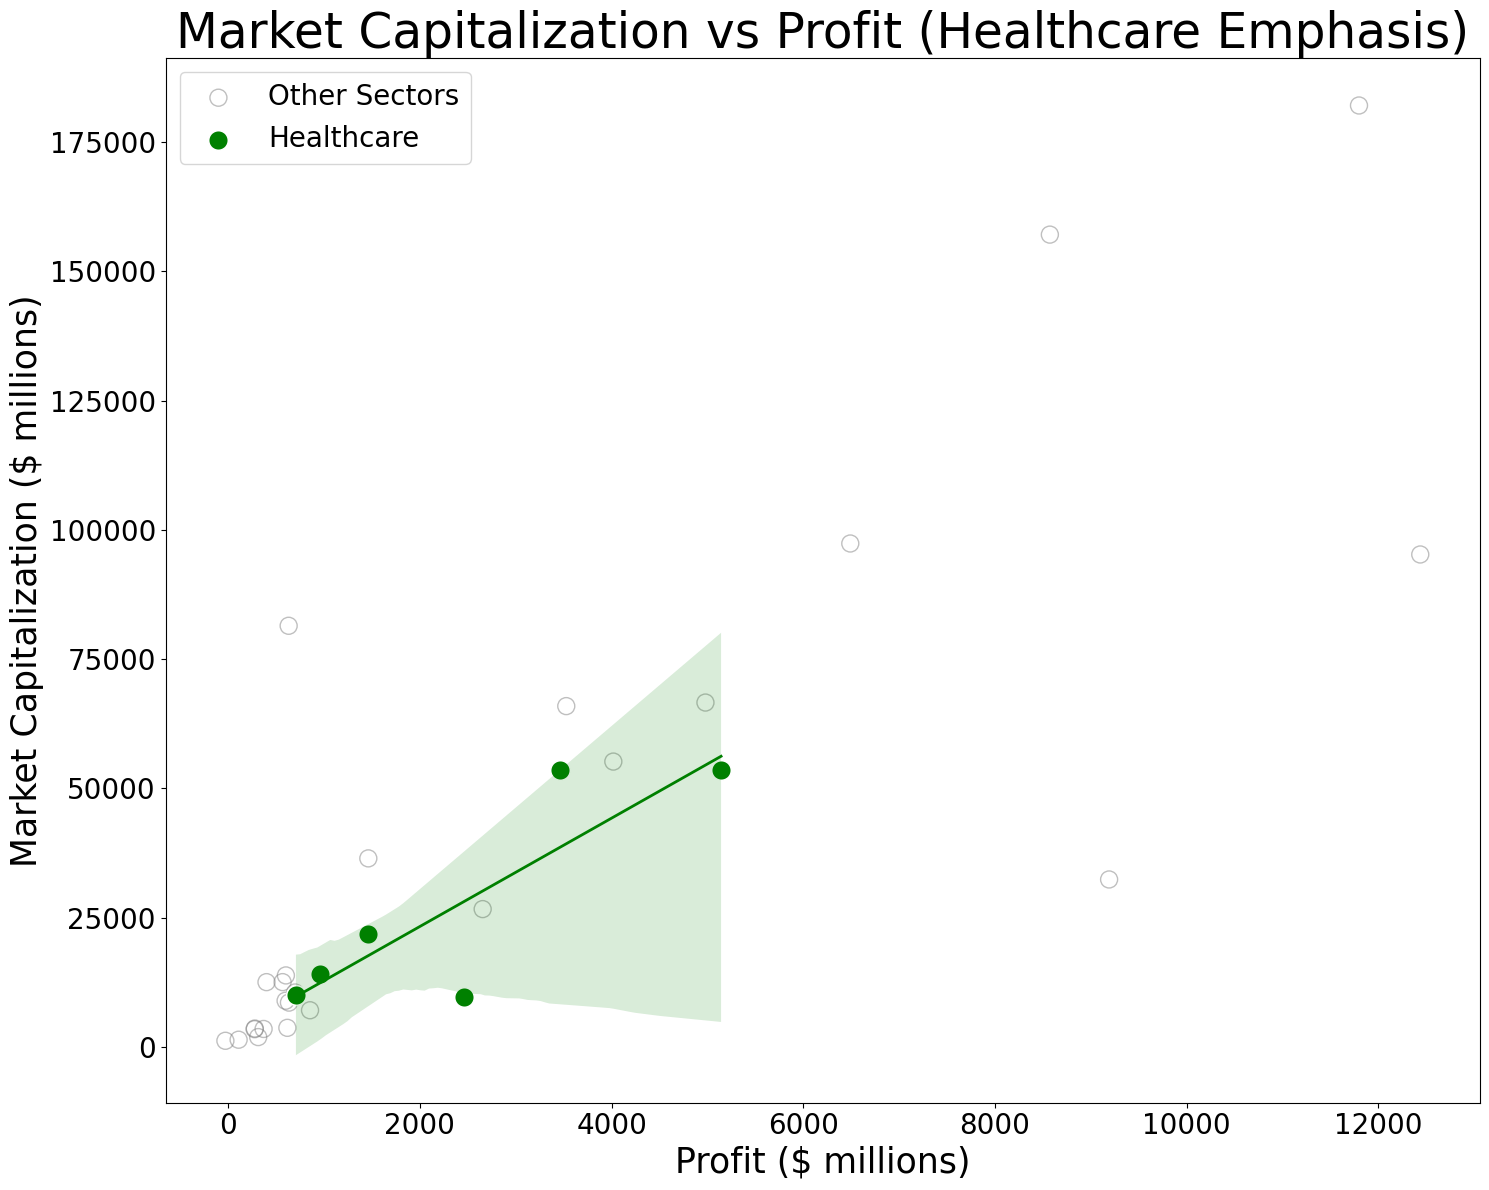

In [ ]:
# Set figure size
plt.figure(figsize=(15, 12))

# Separate data: Healthcare and others
healthcare_df = df[df['Sector'] == 'Healthcare']
other_sectors_df = df[df['Sector'] != 'Healthcare']

# Plot other sectors in gray without fill
plt.scatter(
    other_sectors_df['Profits ($ millions)'],
    other_sectors_df['Market Capitalization ($ millions)'],
    edgecolor='gray', facecolor='none', alpha=0.5, s=150, label='Other Sectors'
)

# Plot Healthcare sector data points
sns.scatterplot(
    data=healthcare_df,
    x='Profits ($ millions)',
    y='Market Capitalization ($ millions)',
    color='green',
    s=200,
    label='Healthcare'
)

# Add regression trendline for Healthcare sector only
sns.regplot(
    data=healthcare_df,
    x='Profits ($ millions)',
    y='Market Capitalization ($ millions)',
    scatter=False,
    color='green',
    line_kws={'linewidth': 2}
)

# Title and labels
plt.title('Market Capitalization vs Profit (Healthcare Emphasis)', fontsize=35)
plt.xlabel('Profit ($ millions)', fontsize=25)
plt.ylabel('Market Capitalization ($ millions)', fontsize=25)

# Adjust tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Legend
plt.legend(fontsize=20, title_fontsize=20)

plt.tight_layout()
plt.show()